## MTA ridership data March 2020 - Jan 2022
### Transportation around New York City during several phases of the Covid-19 pandemic
#### Focusing on three methods of travel:
 - vehicular traffic from bridges and tunnels
 - subway ridership
 - bus ridership

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ridership_file = "Resources/JAN_MTA_recent_ridership_data_20220103.csv"
ridership_df = pd.read_csv(ridership_file)

In [3]:
ridership_df.head()

Date  Subways: Total Estimated Ridership  \
0    1/3/22                             2169857   
1    1/2/22                             1220577   
2    1/1/22                             1028836   
3  12/31/21                             1629389   
4  12/30/21                             2201870   

   Subways: % of Comparable Pre-Pandemic Day  \
0                                       41.4   
1                                       53.6   
2                                       44.5   
3                                       52.2   
4                                       50.8   

   Buses: Total Estimated Ridership  Buses: % of Comparable Pre-Pandemic Day  \
0                            849830                                     40.6   
1                            458780                                     48.7   
2                            342025                                     45.2   
3                            685526                                     56.8   
4                            901238                                     58.7   

   LIRR: Total Estimated Ridership  \
0                         103000.0   
1                          49200.0   
2                          34000.0   
3                          96700.0   
4                         110100.0   

   LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average  \
0                                               35.0         
1                                               53.0         
2                                               30.0         
3                                               32.0         
4                                               38.0         

   Metro-North: Total Estimated Ridership  \
0                                 84000.0   
1                                 42600.0   
2                                 30300.0   
3                                 85200.0   
4                                 90800.0   

   Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average  \
0                                               32.0                
1                                               53.0                
2                                               31.0                
3                                               32.0                
4                                               35.0                

  Access-A-Ride: Total Scheduled Trips  \
0                                16437   
1                                 8383   
2                                 4904   
3                                11498   
4                                16177   

  Access-A-Ride: % of Comparable Pre-Pandemic Day  \
0                                           55.20   
1                                           45.00   
2                                           57.50   
3                                           75.70   
4                                           65.70   

   Bridges and Tunnels: Total Traffic  \
0                              692740   
1                              624655   
2                              498515   
3                              628305   
4                              804654   

   Bridges and Tunnels: % of Comparable Pre-Pandemic Day  
0                                               83.2      
1                                               88.8      
2                                               74.6      
3                                               73.7      
4                                               98.5

In [4]:
# check datatypes
ridership_df.dtypes

Date                                                               object
Subways: Total Estimated Ridership                                  int64
Subways: % of Comparable Pre-Pandemic Day                         float64
Buses: Total Estimated Ridership                                    int64
Buses: % of Comparable Pre-Pandemic Day                           float64
LIRR: Total Estimated Ridership                                   float64
LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average           float64
Metro-North: Total Estimated Ridership                            float64
Metro-North: % of 2019 Monthly Weekday/Saturday/Sunday Average    float64
Access-A-Ride: Total Scheduled Trips                               object
Access-A-Ride: % of Comparable Pre-Pandemic Day                    object
Bridges and Tunnels: Total Traffic                                  int64
Bridges and Tunnels: % of Comparable Pre-Pandemic Day             float64
dtype: object

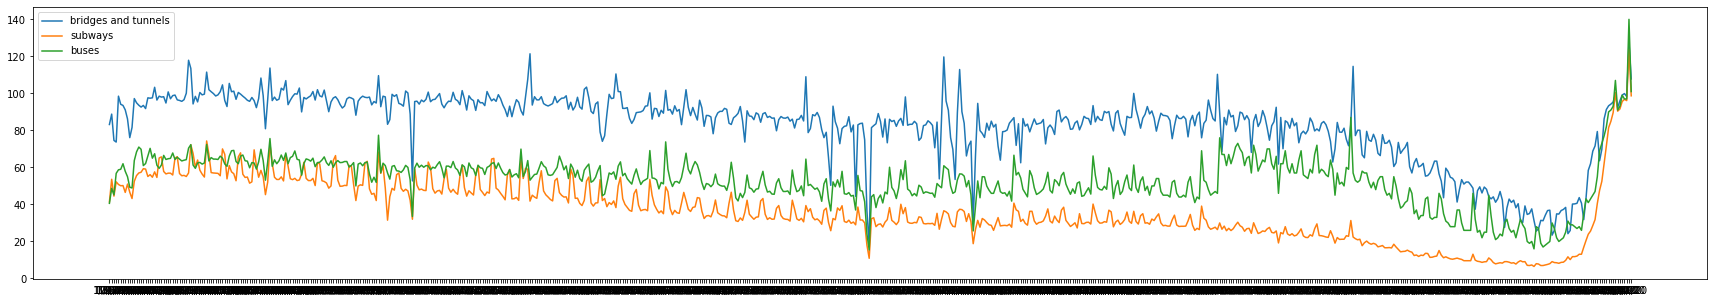

<Figure size 720x360 with 0 Axes>

In [12]:
# Bridge and Tunnel data
x = ridership_df["Date"]
y = ridership_df["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

bridge_tunnel, = plt.plot(x, y)

# Subway data
x1 = ridership_df["Date"]
y1 = ridership_df["Subways: % of Comparable Pre-Pandemic Day"]

subway, = plt.plot(x1, y1)

# buses data
x2 = ridership_df["Date"]
y2 = ridership_df["Buses: % of Comparable Pre-Pandemic Day"]

buses, = plt.plot(x2, y2)

plt.legend([bridge_tunnel, subway, buses], 
           ["bridges and tunnels", "subways", "buses"], loc='best')
# plt.isinteractive()
         
plt.figure(figsize=(10,5))
# plt.rcParams["figure.figsize"] = (30,5)
# plt.tight_layout()

plt.show()

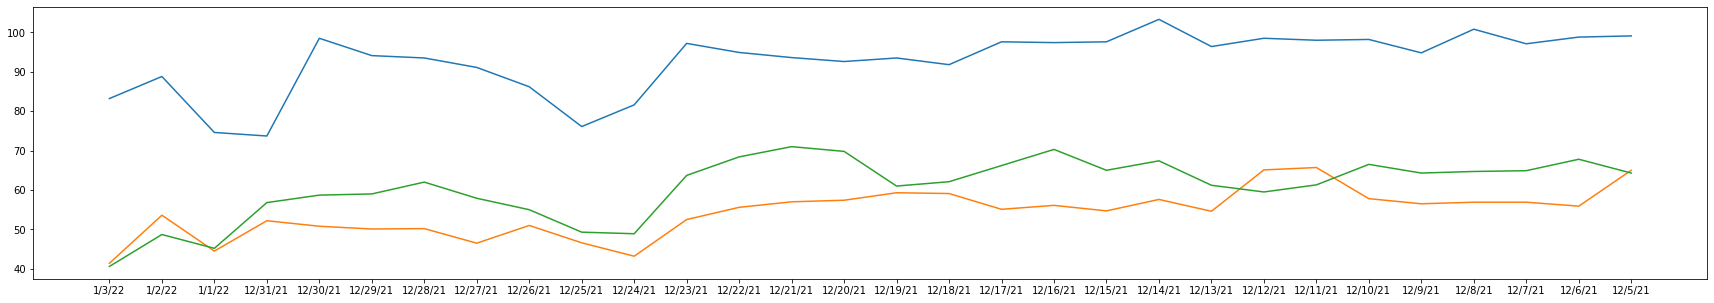

<Figure size 720x360 with 0 Axes>

In [13]:
# view last 30 days
last_thirty = ridership_df.head(30)

# Bridge and Tunnel data
x = last_thirty["Date"]
y = last_thirty["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

# plt.plot(x, y)


# Subway data
x1 = last_thirty["Date"]
y1 = last_thirty["Subways: % of Comparable Pre-Pandemic Day"]

# buses data
x2 = last_thirty["Date"]
y2 = last_thirty["Buses: % of Comparable Pre-Pandemic Day"]

plt.plot(x, y, x1,y1, x2, y2)

plt.figure(figsize=(10,5))
# plt.rcParams["figure.figsize"] = (20,10)
# plt.tight_layout()

plt.show()

### Adjusting to chronological order
#### MTA data is in reverse chronological order, from Jan 2022 back to March 2020. While current ridership is of interest, on a chart the viewer expects the x-axis to be organized in chronological order. 
#### Because the date field is a string, I used the index to sort the data and return a new dataframe in chrono order. 

In [45]:
# sort by index to organize in chron order: 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html
chron_df = ridership_df.sort_index(axis=0, level=None, ascending=False, 
                                  inplace=False, kind='quicksort', 
                                  na_position='last', sort_remaining=True, 
                                  ignore_index=True)
chron_df

Date  Subways: Total Estimated Ridership  \
0      3/1/20                             2214601   
1      3/2/20                             5347055   
2      3/3/20                             5498556   
3      3/4/20                             5515945   
4      3/5/20                             5513656   
..        ...                                 ...   
669  12/30/21                             2201870   
670  12/31/21                             1629389   
671    1/1/22                             1028836   
672    1/2/22                             1220577   
673    1/3/22                             2169857   

     Subways: % of Comparable Pre-Pandemic Day  \
0                                         98.7   
1                                        123.9   
2                                         96.1   
3                                         96.8   
4                                         95.6   
..                                         ...   
669                                       50.8   
670                                       52.2   
671                                       44.5   
672                                       53.6   
673                                       41.4   

     Buses: Total Estimated Ridership  \
0                              984900   
1                             2209100   
2                             2228600   
3                             2177200   
4                             2244500   
..                                ...   
669                            901238   
670                            685526   
671                            342025   
672                            458780   
673                            849830   

     Buses: % of Comparable Pre-Pandemic Day  LIRR: Total Estimated Ridership  \
0                                      101.0                              NaN   
1                                      140.0                              NaN   
2                                       97.0                              NaN   
3                                       97.0                              NaN   
4                                       99.0                              NaN   
..                                       ...                              ...   
669                                     58.7                         110100.0   
670                                     56.8                          96700.0   
671                                     45.2                          34000.0   
672                                     48.7                          49200.0   
673                                     40.6                         103000.0   

     LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average  \
0                                                  NaN         
1                                                  NaN         
2                                                  NaN         
3                                                  NaN         
4                                                  NaN         
..                                                 ...         
669                                               38.0         
670                                               32.0         
671                                               30.0         
672                                               53.0         
673                                               35.0         

     Metro-North: Total Estimated Ridership  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
669                                 90800.0   
670                                 85200.0   
671                                 30300.0   
672                                 42600.0   
673                

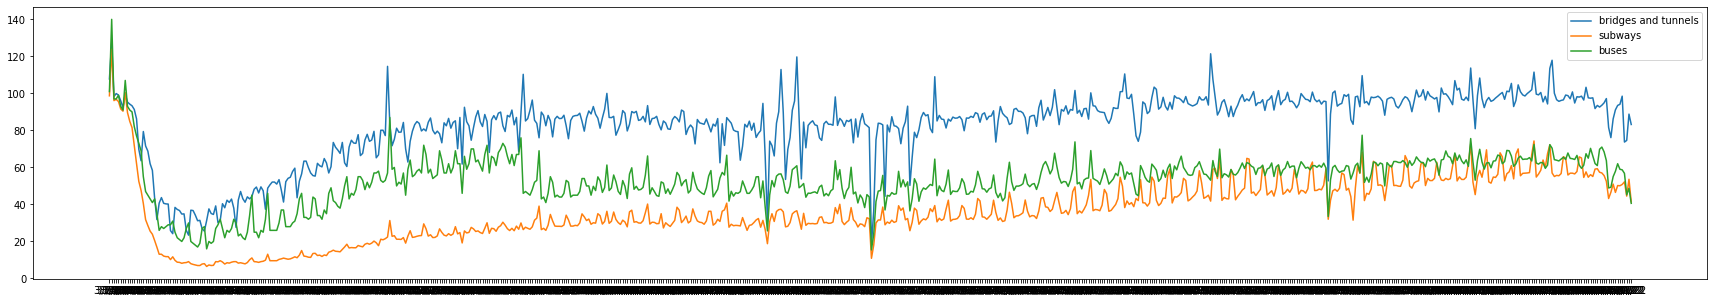

<Figure size 720x360 with 0 Axes>

In [46]:
# Bridge and Tunnel data
x = chron_df["Date"]
y = chron_df["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

bridge_tunnel, = plt.plot(x, y)

# Subway data
x1 = chron_df["Date"]
y1 = chron_df["Subways: % of Comparable Pre-Pandemic Day"]

subway, = plt.plot(x1, y1)

# buses data
x2 = chron_df["Date"]
y2 = chron_df["Buses: % of Comparable Pre-Pandemic Day"]

buses, = plt.plot(x2, y2)

plt.legend([bridge_tunnel, subway, buses], 
           ["bridges and tunnels", "subways", "buses"], loc='best')
# plt.isinteractive()
         
plt.figure(figsize=(10,5))
# plt.rcParams["figure.figsize"] = (30,5)
# plt.tight_layout()

plt.show()

### Experimenting with viewing data in circular format
#### Following [tutorial](https://www.python-graph-gallery.com/circular-barplot-basic) on Python Graph Gallery

In [59]:
# dataset for circular barplot: let's start with bridge and tunnel data
# UPDATE: circular barplot plots in proper date order when using df in reverse chron order, regardless of index

bt_df = ridership_df[["Date","Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]]
bt_df

Date  Bridges and Tunnels: % of Comparable Pre-Pandemic Day
0      1/3/22                                               83.2    
1      1/2/22                                               88.8    
2      1/1/22                                               74.6    
3    12/31/21                                               73.7    
4    12/30/21                                               98.5    
..        ...                                                ...    
669    3/5/20                                               99.1    
670    3/4/20                                               99.9    
671    3/3/20                                               98.3    
672    3/2/20                                              127.5    
673    3/1/20                                              107.8    

[674 rows x 2 columns]

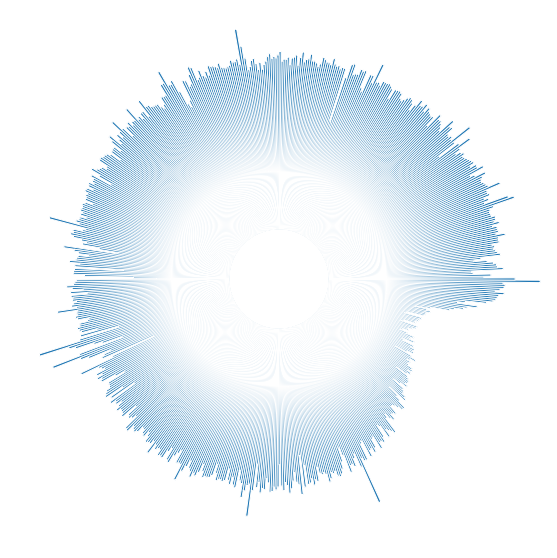

In [60]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = bt_df['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * bt_df['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(bt_df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(bt_df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=1, 
    edgecolor="white")

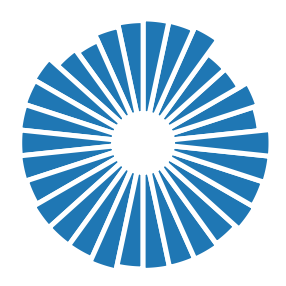

In [51]:
# last_thirty["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]

# set figure size
plt.figure(figsize=(5,5))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = last_thirty['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * last_thirty['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(last_thirty.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(last_thirty.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=5, 
    edgecolor="white")

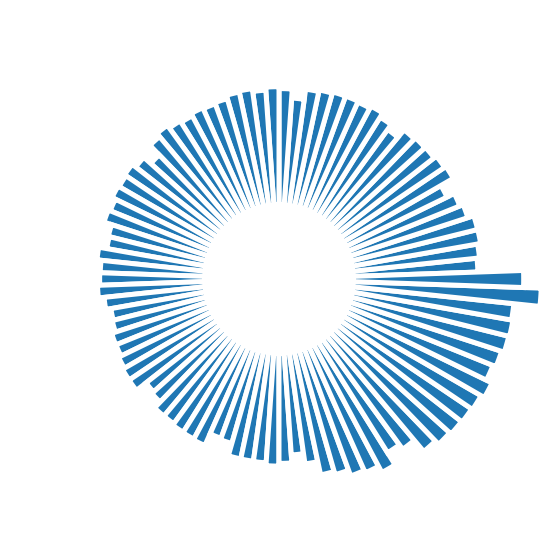

In [62]:
# 1st 90 days 
first_ninety = bt_df.tail(90)

# set figure size
plt.figure(figsize=(10,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 50

# Compute max and min in the dataset
max = first_ninety['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * first_ninety['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(first_ninety.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(first_ninety.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=5, 
    edgecolor="white")

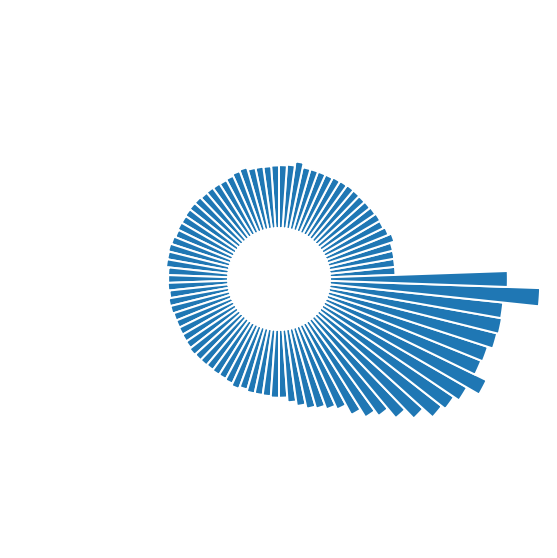

In [63]:
# subway_df = chron_df[["Date","Subways: % of Comparable Pre-Pandemic Day"]]

# using original dataframe for reverse date order, which renders properly in circular barplot 
subway_df = ridership_df[["Date","Subways: % of Comparable Pre-Pandemic Day"]]

# 1st 90 days 
first_ninety = subway_df.tail(90)

# set figure size
plt.figure(figsize=(10,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = first_ninety["Subways: % of Comparable Pre-Pandemic Day"].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * first_ninety["Subways: % of Comparable Pre-Pandemic Day"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(first_ninety.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(first_ninety.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

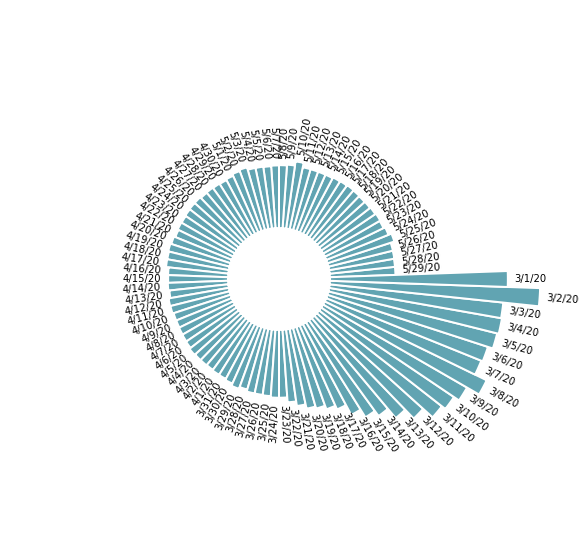

In [64]:
# viewing date labels to confirm proper order 
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, first_ninety["Date"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

### Perform data cleanup to export a csv to use in Tableau
- use data in chronological order
- export subway, bus, and vehicle (bridges and tunnels) data by date
- move to Tableau to create a radial bar chart

In [25]:
chron_df

Date  Subways: Total Estimated Ridership  \
673    3/1/20                             2214601   
672    3/2/20                             5347055   
671    3/3/20                             5498556   
670    3/4/20                             5515945   
669    3/5/20                             5513656   
..        ...                                 ...   
4    12/30/21                             2201870   
3    12/31/21                             1629389   
2      1/1/22                             1028836   
1      1/2/22                             1220577   
0      1/3/22                             2169857   

     Subways: % of Comparable Pre-Pandemic Day  \
673                                       98.7   
672                                      123.9   
671                                       96.1   
670                                       96.8   
669                                       95.6   
..                                         ...   
4                                         50.8   
3                                         52.2   
2                                         44.5   
1                                         53.6   
0                                         41.4   

     Buses: Total Estimated Ridership  \
673                            984900   
672                           2209100   
671                           2228600   
670                           2177200   
669                           2244500   
..                                ...   
4                              901238   
3                              685526   
2                              342025   
1                              458780   
0                              849830   

     Buses: % of Comparable Pre-Pandemic Day  LIRR: Total Estimated Ridership  \
673                                    101.0                              NaN   
672                                    140.0                              NaN   
671                                     97.0                              NaN   
670                                     97.0                              NaN   
669                                     99.0                              NaN   
..                                       ...                              ...   
4                                       58.7                         110100.0   
3                                       56.8                          96700.0   
2                                       45.2                          34000.0   
1                                       48.7                          49200.0   
0                                       40.6                         103000.0   

     LIRR: % of 2019 Monthly Weekday/Saturday/Sunday Average  \
673                                                NaN         
672                                                NaN         
671                                                NaN         
670                                                NaN         
669                                                NaN         
..                                                 ...         
4                                                 38.0         
3                                                 32.0         
2                                                 30.0         
1                                                 53.0         
0                                                 35.0         

     Metro-North: Total Estimated Ridership  \
673                                     NaN   
672                                     NaN   
671                                     NaN   
670                                     NaN   
669                                     NaN   
..                                      ...   
4                                   90800.0   
3                                   85200.0   
2                                   30300.0   
1                                   42600.0   
0                  

In [67]:
# create a dataframe with filtered columns
cleaned_df = chron_df[["Date","Subways: % of Comparable Pre-Pandemic Day", 
                       "Buses: % of Comparable Pre-Pandemic Day",
                       "Bridges and Tunnels: % of Comparable Pre-Pandemic Day"]]
cleaned_df

Date  Subways: % of Comparable Pre-Pandemic Day  \
0      3/1/20                                       98.7   
1      3/2/20                                      123.9   
2      3/3/20                                       96.1   
3      3/4/20                                       96.8   
4      3/5/20                                       95.6   
..        ...                                        ...   
669  12/30/21                                       50.8   
670  12/31/21                                       52.2   
671    1/1/22                                       44.5   
672    1/2/22                                       53.6   
673    1/3/22                                       41.4   

     Buses: % of Comparable Pre-Pandemic Day  \
0                                      101.0   
1                                      140.0   
2                                       97.0   
3                                       97.0   
4                                       99.0   
..                                       ...   
669                                     58.7   
670                                     56.8   
671                                     45.2   
672                                     48.7   
673                                     40.6   

     Bridges and Tunnels: % of Comparable Pre-Pandemic Day  
0                                                107.8      
1                                                127.5      
2                                                 98.3      
3                                                 99.9      
4                                                 99.1      
..                                                 ...      
669                                               98.5      
670                                               73.7      
671                                               74.6      
672                                               88.8      
673                                               83.2      

[674 rows x 4 columns]

In [ ]:
# export to csv
import os

cleaned_df.to_csv("Resources/mta-ridership-cleaned.csv", index=False)

## Creating figures for 366 days in each mode of transport
- visualizing March 1, 2020 to March 1, 2021

### Subway

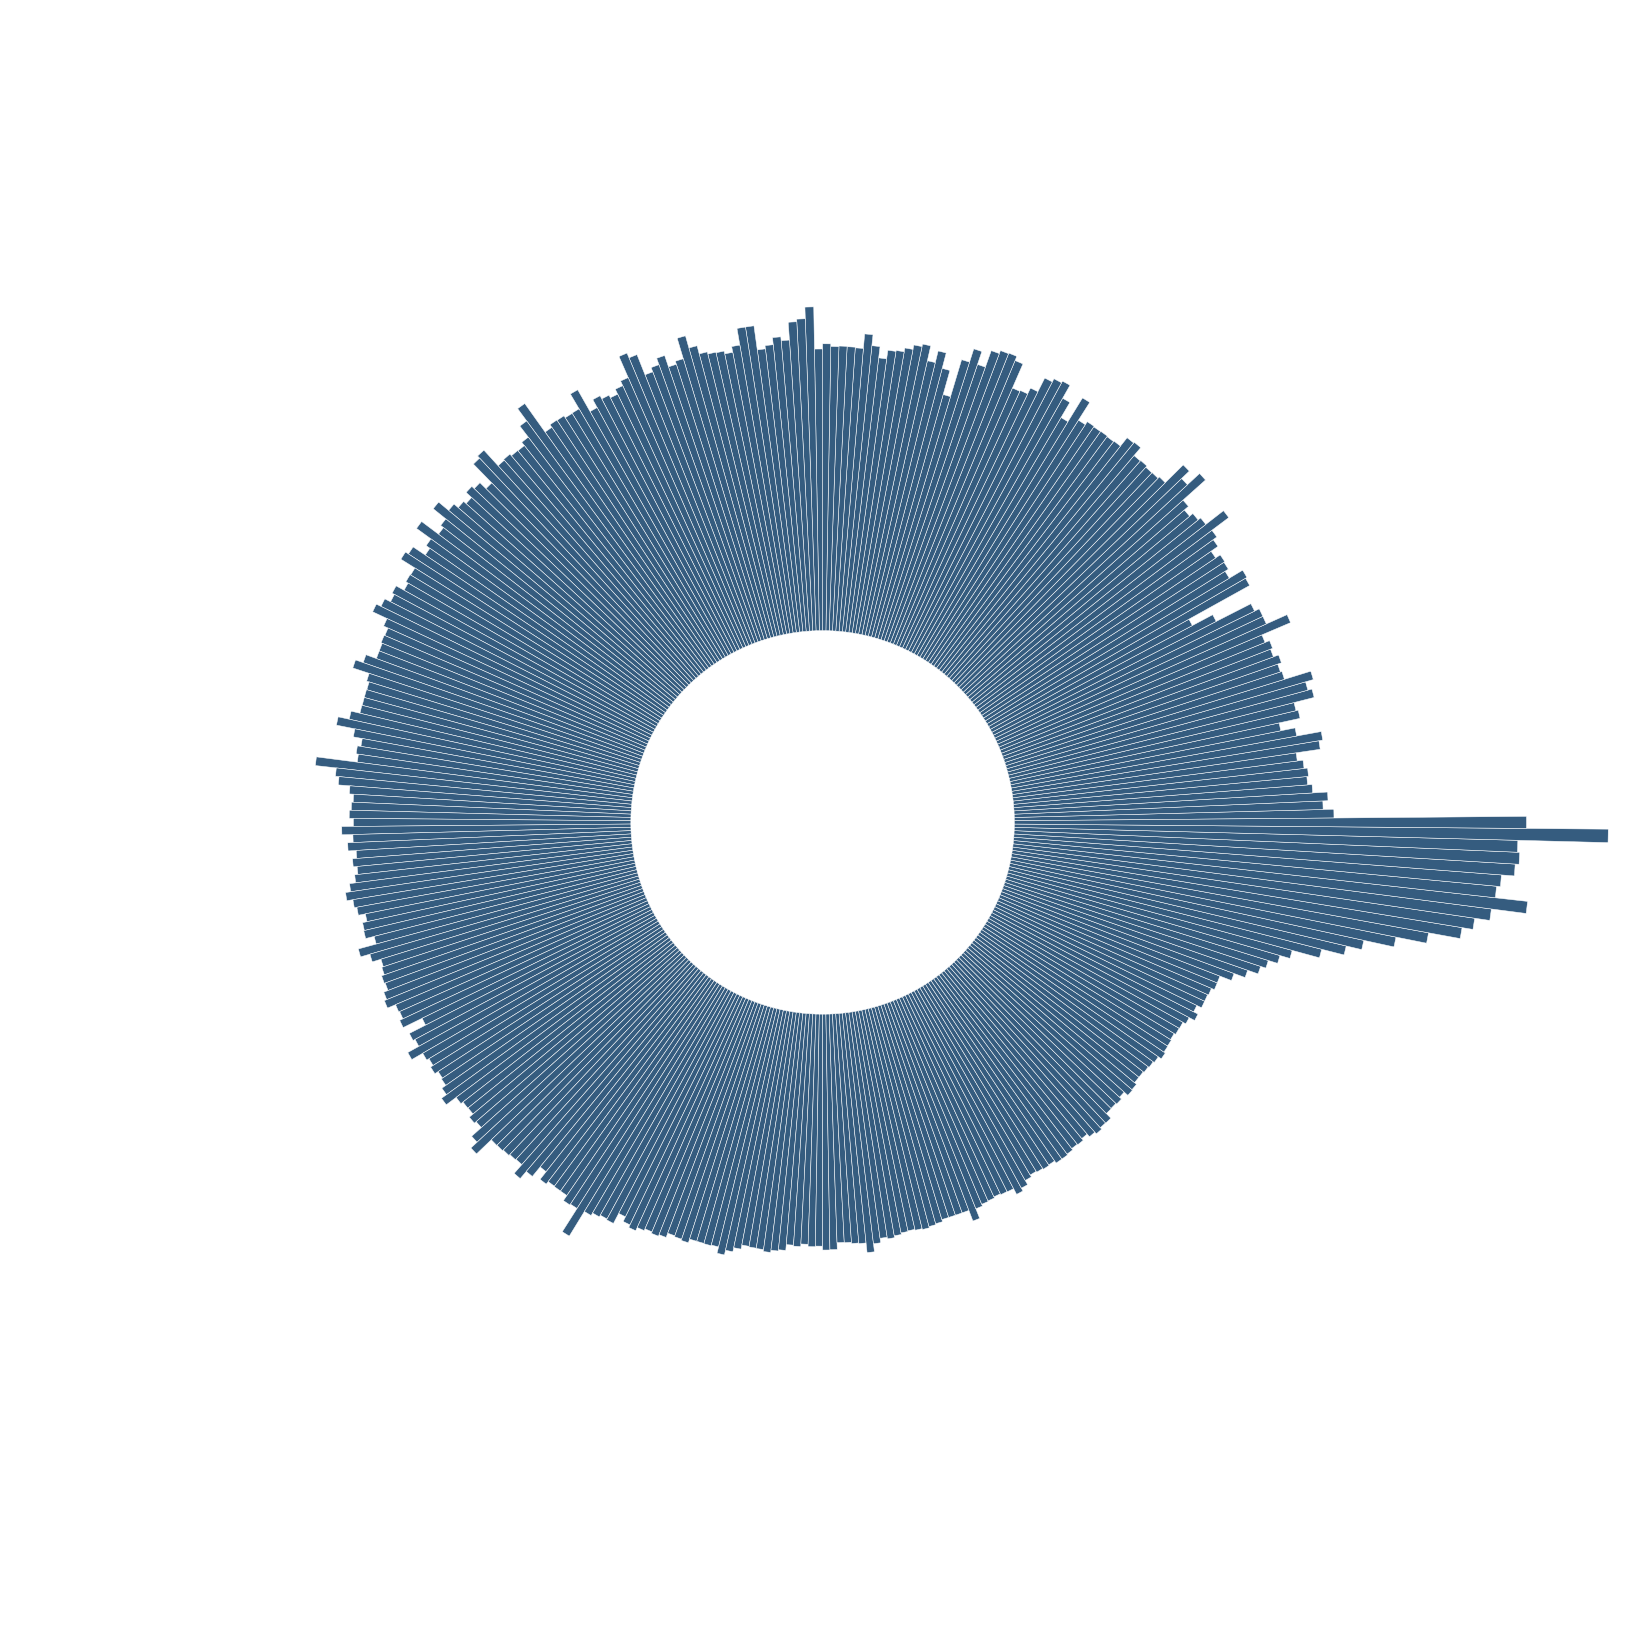

In [98]:
# view each mode of transport for entire date range of dataset
#subway
sub_df = ridership_df[["Date","Subways: % of Comparable Pre-Pandemic Day"]].tail(366)


# set figure size
plt.figure(figsize=(30,30))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 140
lowerLimit = 40

# Compute max and min in the dataset
max = sub_df["Subways: % of Comparable Pre-Pandemic Day"].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * sub_df["Subways: % of Comparable Pre-Pandemic Day"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(sub_df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(sub_df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=.5,
    color="#355C7F",
    edgecolor="white")

# save figure 
plt.savefig("Images/subways_march20_march21.png")

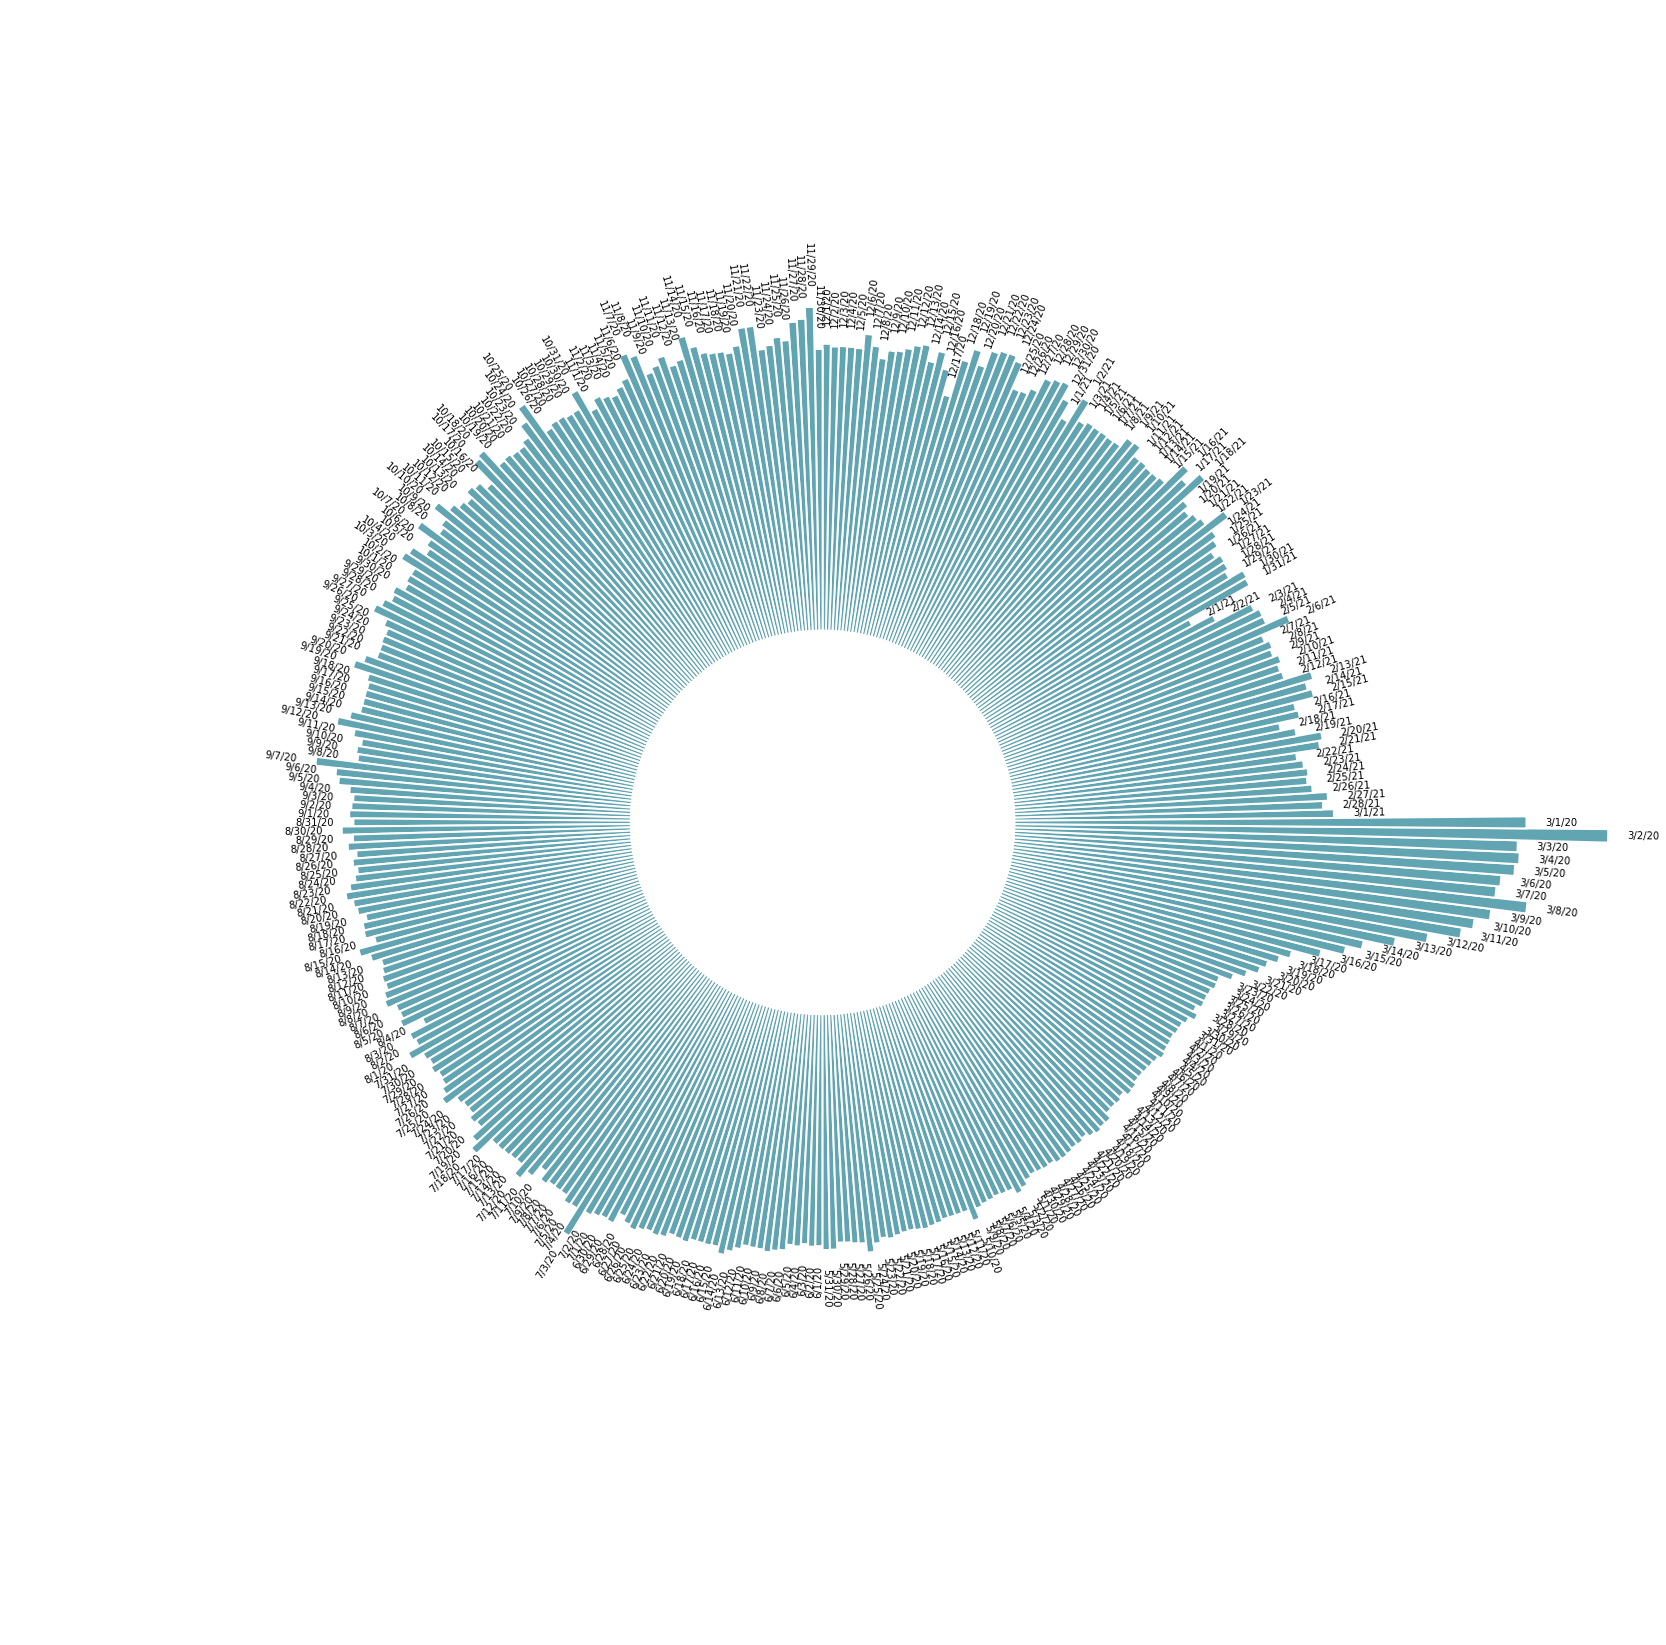

In [94]:
# checking dates along axis for subway figure
# initialize the figure
plt.figure(figsize=(30,30))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, sub_df["Date"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

## Vehicular Traffic 

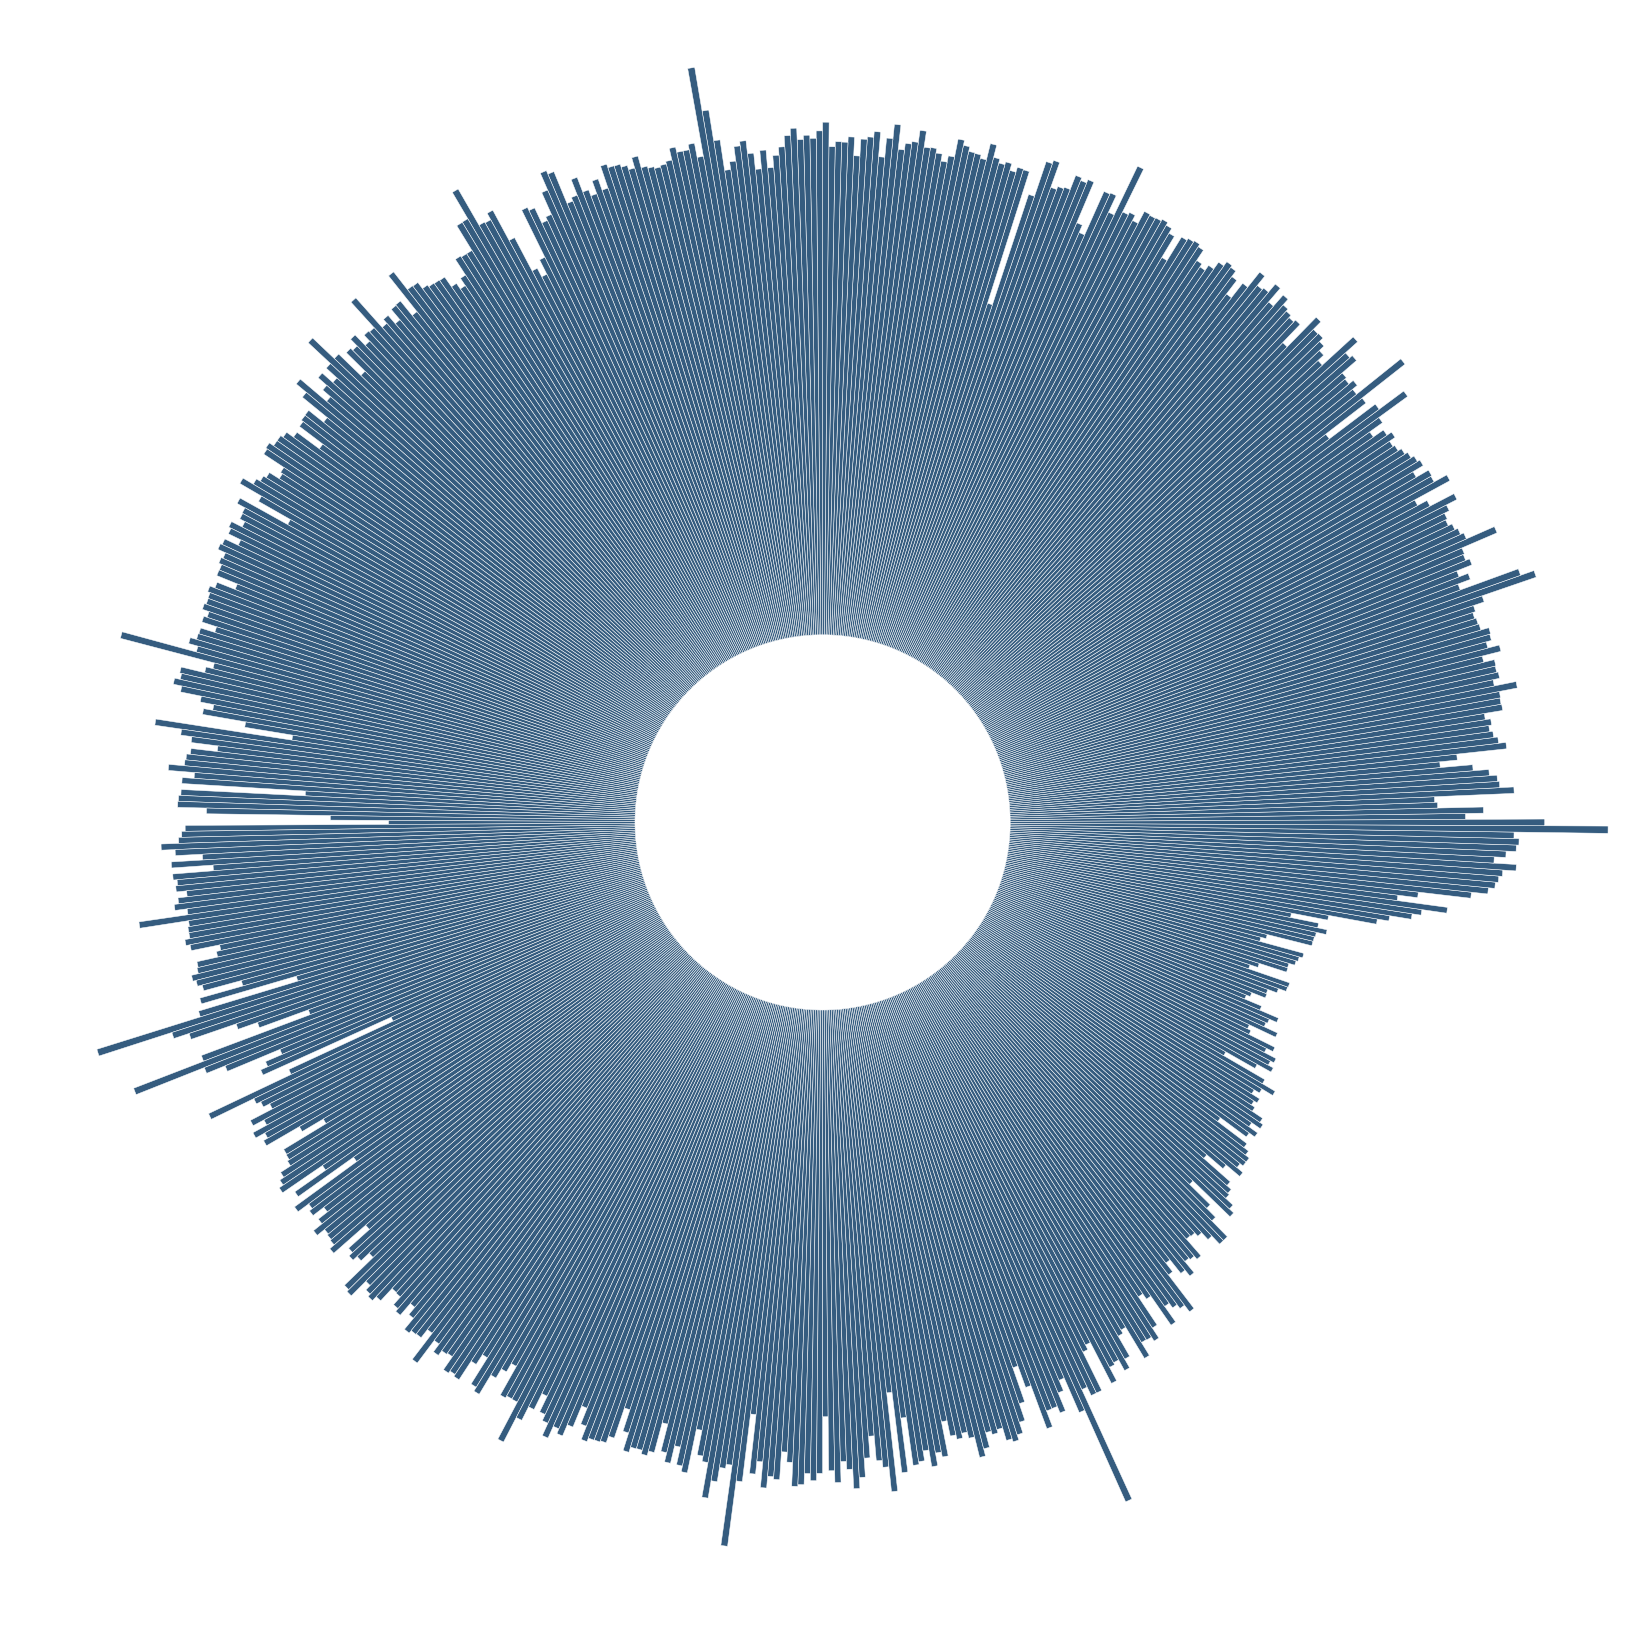

In [95]:
# view each mode of transport for entire date range of dataset
# bridge and tunnel (vehicular traffic)
bt_df.tail(366)

# set figure size
plt.figure(figsize=(30,30))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 140
lowerLimit = 40

# Compute max and min in the dataset
max = bt_df["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * bt_df["Bridges and Tunnels: % of Comparable Pre-Pandemic Day"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(bt_df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(bt_df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=.5,
    color="#355C7F",
    edgecolor="white")

## Bus

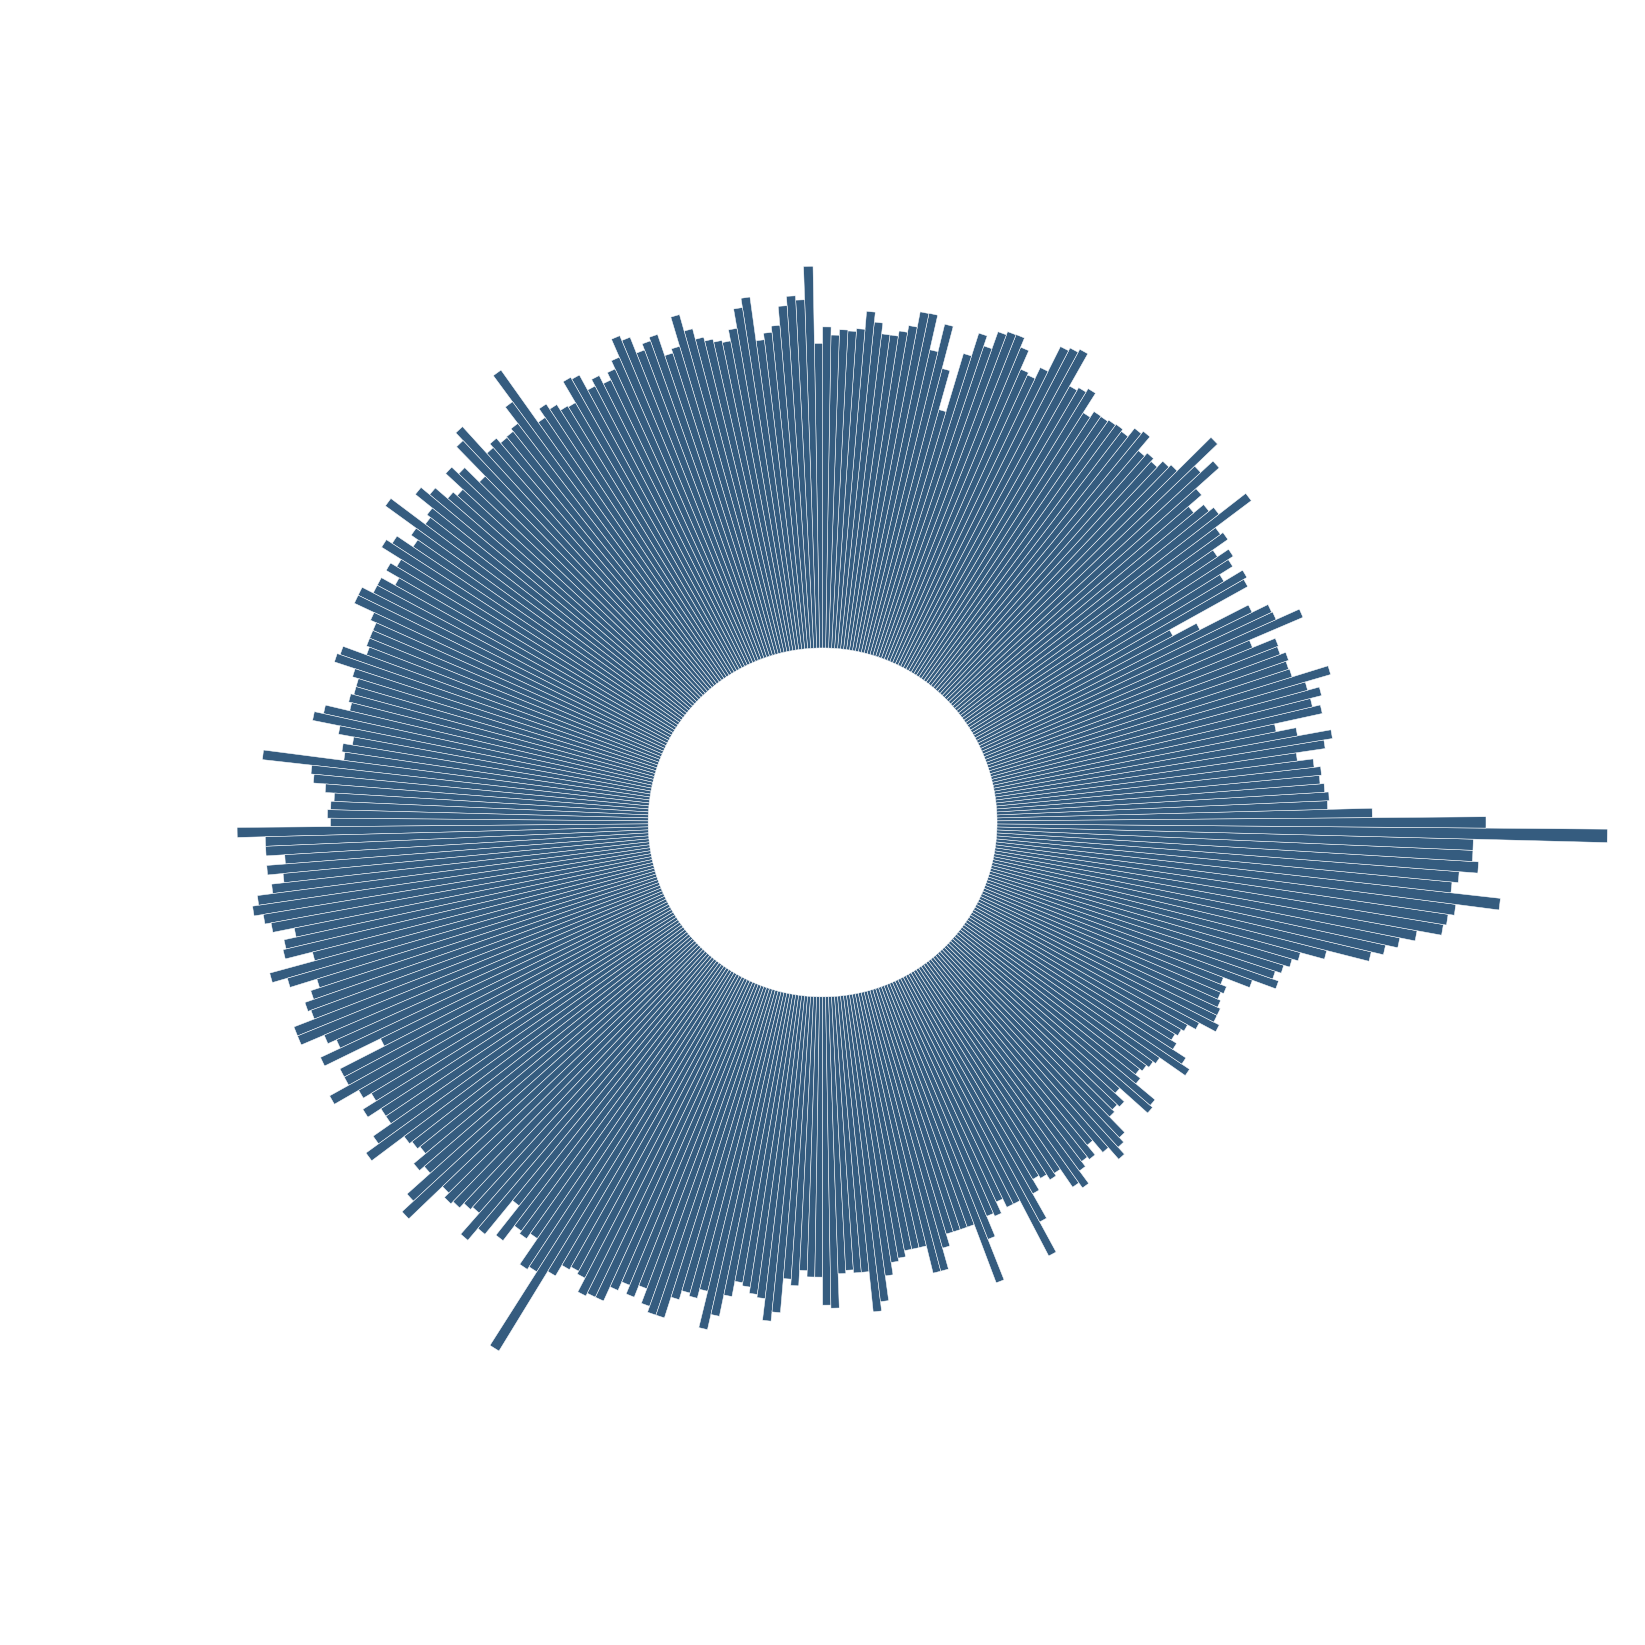

In [96]:
# view each mode of transport for entire date range of dataset
# buses
bus_df = ridership_df[["Date","Buses: % of Comparable Pre-Pandemic Day"]].tail(366)

# set figure size
plt.figure(figsize=(30,30))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 140
lowerLimit = 40

# Compute max and min in the dataset
max = bus_df["Buses: % of Comparable Pre-Pandemic Day"].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * bus_df["Buses: % of Comparable Pre-Pandemic Day"] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(bus_df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(bus_df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=.5,
    color="#355C7F",
    edgecolor="white")

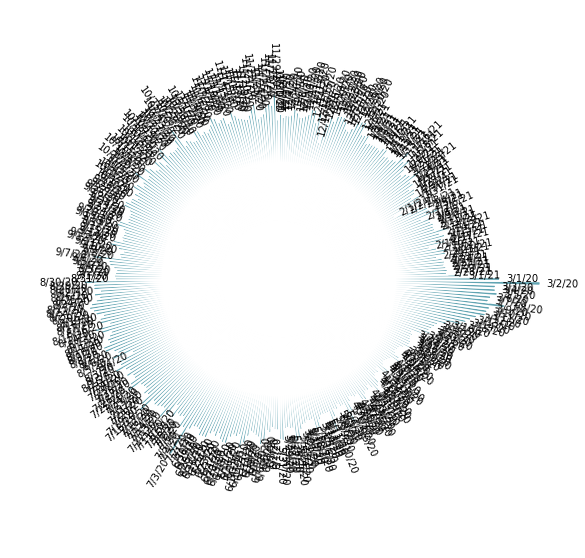

In [97]:
# checking dates along axis for bus figure 
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, bus_df["Date"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 